<a href="https://colab.research.google.com/github/CristobalSVM/Procesamiento_Clasificacion_Datos/blob/main/Pr%C3%A1ctica_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# Importar las bibliotecas necesarias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, roc_auc_score
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt

# Cargar los datos (supongamos que tu conjunto de datos se llama 'datos.csv')
datos = pd.read_excel('/content/MCD BD RENOV.xlsx')



In [8]:
# Duplicados
duplicados_datos = datos[datos.duplicated()]
duplicados_datos

0      False
1      False
2      False
3      False
4      False
       ...  
922    False
923    False
924    False
925    False
926    False
Length: 927, dtype: bool

In [6]:
# Dividir el conjunto de datos en características (X) y variable dependiente (y)
X = datos[['monto', 'ciclo', 'integrantes', 'territorio']]
y = datos['renovado']

# Codificación one-hot para la variable categórica 'territorio'
encoder = OneHotEncoder(sparse=False)
territorio_encoded = encoder.fit_transform(X[['territorio']])
territorio_encoded_df = pd.DataFrame(territorio_encoded, columns=[f'territorio_{territory}' for territory in encoder.get_feature_names_out(['territorio'])])

# Concatenar las características codificadas one-hot con las otras variables numéricas
X = pd.concat([X[['monto', 'ciclo', 'integrantes']], territorio_encoded_df], axis=1)



/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [7]:
# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear un árbol de decisión
arbol_decision = DecisionTreeClassifier(random_state=42)
arbol_decision.fit(X_train, y_train)

# Crear un bosque aleatorio
bosque_aleatorio = RandomForestClassifier(random_state=42)
bosque_aleatorio.fit(X_train, y_train)

# Realizar predicciones
predicciones_arbol = arbol_decision.predict(X_test)
predicciones_bosque = bosque_aleatorio.predict(X_test)



In [8]:
# Evaluar el rendimiento del Árbol de Decisión
print("Árbol de Decisión:")
print("Matriz de Confusión:\n", confusion_matrix(y_test, predicciones_arbol))
print("Exactitud:", accuracy_score(y_test, predicciones_arbol))
print("Informe de Clasificación:\n", classification_report(y_test, predicciones_arbol))






Árbol de Decisión:
Matriz de Confusión:
 [[28 47]
 [34 77]]
Exactitud: 0.5645161290322581
Informe de Clasificación:
               precision    recall  f1-score   support

           0       0.45      0.37      0.41        75
           1       0.62      0.69      0.66       111

    accuracy                           0.56       186
   macro avg       0.54      0.53      0.53       186
weighted avg       0.55      0.56      0.56       186



In [10]:
# Evaluar el rendimiento del Bosque Aleatorio
print("\nBosque Aleatorio:")
print("Matriz de Confusión:\n", confusion_matrix(y_test, predicciones_bosque))
print("Exactitud:", accuracy_score(y_test, predicciones_bosque))
print("Informe de Clasificación:\n", classification_report(y_test, predicciones_bosque))




Bosque Aleatorio:
Matriz de Confusión:
 [[23 52]
 [20 91]]
Exactitud: 0.6129032258064516
Informe de Clasificación:
               precision    recall  f1-score   support

           0       0.53      0.31      0.39        75
           1       0.64      0.82      0.72       111

    accuracy                           0.61       186
   macro avg       0.59      0.56      0.55       186
weighted avg       0.60      0.61      0.58       186



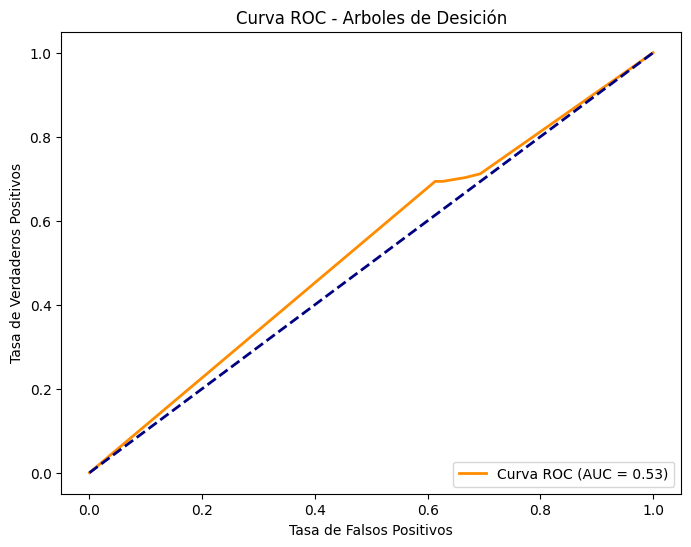

In [14]:
# Curva ROC para el Bosque Aleatorio
probabilidades_arbol = arbol_decision.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, probabilidades_arbol)
roc_auc = roc_auc_score(y_test, probabilidades_arbol)

# Visualizar la Curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC - Arboles de Desición')
plt.legend(loc="lower right")
plt.show()

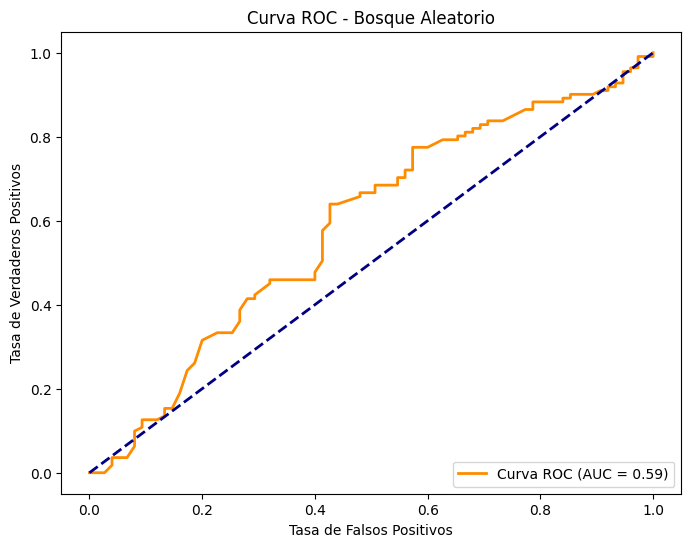

In [12]:
# Curva ROC para el Bosque Aleatorio
probabilidades_bosque = bosque_aleatorio.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, probabilidades_bosque)
roc_auc = roc_auc_score(y_test, probabilidades_bosque)

# Visualizar la Curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC - Bosque Aleatorio')
plt.legend(loc="lower right")
plt.show()

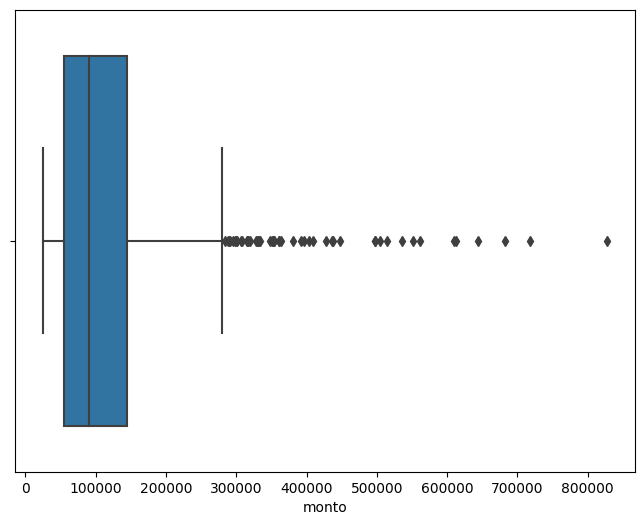

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns  # Opcional, pero seaborn proporciona estilos atractivos


# Crear un diagrama de caja
plt.figure(figsize=(8, 6))
sns.boxplot(x=datos['monto'])

# Mostrar el diagrama de caja
plt.show()

<Axes: xlabel='ciclo'>

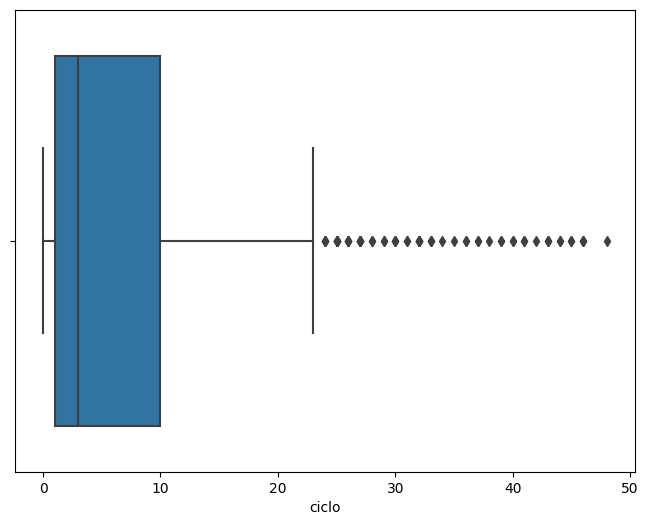

In [18]:
# Crear un diagrama de caja
plt.figure(figsize=(8, 6))
sns.boxplot(x=datos['ciclo'])
